# <center> Q1. Exploratory data analysis with Pandas on Telecom Churn



## 1. Demonstration of main Pandas methods

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 4)

We'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [3]:
df = pd.read_csv('Telecom.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

## __Data dimensionality, feature names, and feature types__

__What is the data dimensions of the loaded table ?__

In [4]:
# Write your code here
df.shape

(3333, 21)

__What are the columns names of this data frame ?__

In [5]:
# Write your code here
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

__Print the information of this dataframe, with features and their data types and null values information ?__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Write your code here
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



**Change the column type** of `Churn` feature from `bool` into `int64`:

In [8]:
df["churn"] = df["churn"].astype('int')
df.info()

ValueError: cannot convert float NaN to integer

__Print the basic statistical analysis details of numerical columns of the dataframe__

In [9]:
df.describe()
df.describe(include =['object','bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3330
unique,51,3333,2,2,2
top,WV,330-8142,no,no,False
freq,106,1,3010,2411,2847


__Can you print the statistical details of non-numerical columns of the above dataframe__

In [10]:
df[df['churn'] == 0]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


__Find the count of users who churn and those who do not churn from the above dataframe (in numnbers and also in percentages)__

In [11]:
df.churn.value_counts()

False    2847
True      483
Name: churn, dtype: int64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):




__Sort the rows by 'Total day charge' in ascending order__

In [12]:
df.sort_values(by=['state'], ascending=True,inplace=True)

__Sort the rows by 'Churn' &'Total day charge' in ascending order of both the columns__

In [13]:
df.sort_values(by=['churn','total day minutes'], ascending=[True,False],inplace=True)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,False
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,False
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,DE,138,510,380-7816,yes,no,0,46.5,104,7.91,...,114,15.81,167.5,95,7.54,9.6,4,2.59,4,True
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,NaN
27,MT,54,408,418-6412,no,no,0,134.3,73,22.83,...,100,13.22,102.1,68,4.59,14.7,4,3.97,3,NaN


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: <br>
**what is the proportion of churned users in our dataframe?**

In [14]:
df['state']
df[['state']]

df.loc[[1000,2000,3000]]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1000,MI,133,408,387-9137,no,no,0,277.3,138,47.14,...,117,19.41,117.3,103,5.28,12.8,4,3.46,2,True
2000,PA,28,415,334-5223,no,no,0,168.2,87,28.59,...,92,13.74,192.4,112,8.66,10.1,3,2.73,3,False
3000,NJ,87,510,387-2799,no,no,0,223.2,109,37.94,...,86,10.84,289.3,83,13.02,14.5,4,3.92,3,False


In [15]:

df.loc[1000]

mdf = pd.read_csv('Telecom.csv',index_col=3)
mdf

mdf.loc[['382-4657']][['total day calls','total eve calls','total night calls']]

,total day calls,total eve calls,total night calls
phone number,,,
382-4657,110,99,91


In [16]:
mdf.loc[['382-4657'],['total day calls','total eve calls','total night calls']]

,total day calls,total eve calls,total night calls
phone number,,,
382-4657,110,99,91


In [17]:
mdf.loc['382-4657':'330-6626','total night minutes':'total night charge']

,total night minutes,total night calls,total night charge
phone number,,,
382-4657,244.7,91,11.01
371-7191,254.4,103,11.45
358-1921,162.6,104,7.32
375-9999,196.9,89,8.86
330-6626,186.9,121,8.41


In [18]:
mdf.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
mdf.iloc[[4],[0,5,10]]

,state,number vmail messages,total eve calls
phone number,,,
330-6626,OK,0,122


In [20]:
mdf.iloc[10:20,0:10]

mdf[['area code']]

mdf.columns

mdf.index

Index(['382-4657', '371-7191', '358-1921', '375-9999', '330-6626', '391-8027',
       '355-9993', '329-9001', '335-4719', '330-8173',
       ...
       '362-5899', '377-1164', '368-8555', '347-6812', '348-3830', '414-4276',
       '370-3271', '328-8230', '364-6381', '400-4344'],
      dtype='object', name='phone number', length=3333)

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [21]:
df['churn'] = df['churn'].astype(bool)

df[~df['churn']]['churn'].value_counts()

~df['churn']

df[df['state']== 'VT']

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1165,VT,50,415,387-5891,yes,yes,26,307.1,94,52.21,...,78,24.60,174.9,109,7.87,8.0,3,2.16,0,False
2553,VT,67,408,410-5370,no,no,0,260.4,107,44.27,...,104,17.70,207.9,115,9.36,10.0,2,2.70,6,False
1602,VT,121,415,400-3343,yes,yes,44,254.1,127,43.20,...,108,15.32,196.2,129,8.83,8.7,4,2.35,3,False
143,VT,103,510,390-2805,no,no,0,246.5,47,41.91,...,84,16.62,200.5,96,9.02,11.7,4,3.16,1,False
488,VT,165,510,345-1998,no,no,0,242.9,126,41.29,...,65,17.83,228.4,126,10.28,0.0,0,0.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,VT,128,408,344-1362,no,no,0,227.9,130,38.74,...,71,25.72,191.5,82,8.62,5.5,7,1.49,1,True
1359,VT,73,415,414-1496,no,no,0,217.8,91,37.03,...,97,18.75,277.3,89,12.48,10.3,6,2.78,1,True
144,VT,117,408,390-2390,yes,no,0,167.1,86,28.41,...,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True
547,VT,95,510,378-3508,yes,yes,41,136.8,91,23.26,...,61,17.07,133.7,67,6.02,10.3,9,2.78,5,True


**How much time (on average) do churned users spend on the phone during daytime?**

In [22]:
df[df['churn'] == True]['total day minutes'].mean()

206.48456790123467


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [23]:
df[(df["churn"]== 0) & (df["international plan"] == "no")]["total intl minutes"].describe()

count    2662.0000
mean       10.1827
std         2.8192
min         0.0000
25%         8.4000
50%        10.2000
75%        12.0750
max        18.9000
Name: total intl minutes, dtype: float64

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say <br>
**"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"**. 

In [24]:
df = pd.read_csv('Telecom.csv')
df.loc[0:5, 'state':'area code']

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In the second case, we say <br> **"give us the values of the first five rows in the first three columns" (as in a typical Python slice: the maximal value is not included)**

In [25]:
df.iloc[0:6, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


**Print the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:**

In [26]:
df[:1]
df[-1:]

df[3332:]

df[0:5]

df[["state"]]

df[0:5]
df.iloc[0:5]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


__Print the max value of all numeric columns of the above data frame__

In [27]:
import numpy as np
df[['total day calls','total eve calls']].apply(np.mean)

total day calls    100.4356
total eve calls    100.1143
dtype: float64

__Select all states starting with W__

In [28]:
df[df['state'].apply(lambda x: x.startswith('W'))]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,331-4184,no,no,0,238.0,97,40.46,...,97,13.98,282.5,132,12.71,10.6,6,2.86,2,False
3303,WI,114,415,373-7308,no,yes,26,137.1,88,23.31,...,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3319,WY,89,415,378-6924,no,no,0,115.4,99,19.62,...,115,17.84,280.9,112,12.64,15.9,6,4.29,3,False
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument: <br><br>
__Replace `'No'` with `False` and `'Yes'` with `True` for the column 'international plan' using .map() function__

In [29]:
df = pd.read_csv('Telecom.csv')
d = {'yes' : True ,'no' : False}
df['international plan'] = df['international plan'].map(d)

df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


__Replace `'No'` with `False` and `'Yes'` with `True` for the column 'voice mail plan' using .replace() function__

In [30]:
df.replace({'voice mail plan': d})

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,True,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,False,False,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,False,False,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,True,False,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False



### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

__Group the data according to the values of the `Churn` variable and display statistics of three columns in each group, using .describe(percentiles=[]) function__

In [31]:
df.groupby(by='state')['total day calls','total eve calls','total night calls'].describe(percentiles=[])

/Users/ramaputt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total day calls                                        total eve calls  \
                count      mean      std   min    50%    max           count   
state                                                                          
AK               52.0   95.2692  19.1302  55.0   96.0  129.0            52.0   
AL               80.0   99.1000  17.3779  62.0   96.5  139.0            80.0   
AR               55.0  102.1455  20.8099  56.0  102.0  145.0            55.0   
AZ               64.0  100.1094  22.0160  52.0   98.5  163.0            64.0   
CA               34.0  104.5000  22.8622  42.0  109.5  150.0            34.0   
CO               66.0   95.1212  19.4837  53.0   97.5  145.0            66.0   
CT               74.0   98.4324  20.0684  49.0   99.5  137.0            74.0   
DC               54.0  100.1667  20.3579  61.0  101.5  147.0            54.0   
DE               61.0   98.6393  20.8095  42.0  100.0  140.0            61.0   
FL               63.0  101.0000  16.0744  63.0   98.0  143.0            63.0   
GA               54.0  103.0556  18.5599  61.0  105.0  137.0            54.0   
HI               53.0  102.8113  19.0435  44.0  104.0  147.0            53.0   
IA               44.0  103.0455  20.1540  67.0  101.0  141.0            44.0   
ID               73.0  106.2192  18.7596  65.0  106.0  151.0            73.0   
IL               58.0  101.6897  18.3783  65.0  101.5  141.0            58.0   
IN               71.0  107.0563  19.0255  57.0  107.0  157.0            71.0   
KS               70.0  101.0286  17.2568  68.0  103.5  144.0            70.0   
KY               59.0  100.3390  18.1418  62.0   99.0  147.0            59.0   
LA               51.0  103.5098  17.2538  67.0  101.0  140.0            51.0   
MA               65.0  102.2923  21.4080  49.0  100.0  158.0            65.0   
MD               70.0   99.3571  19.4184  56.0   98.0  145.0            70.0   
ME               62.0   99.5000  19.1848  56.0  102.0  140.0            62.0   
MI               73.0  101.2055  20.2471  53.0  102.0  165.0            73.0   
MN               84.0   99.1190  22.2707  54.0   99.0  147.0            84.0   
MO               63.0   99.9365  19.2663  51.0  101.0  145.0            63.0   
MS               65.0  100.7077  19.6124  48.0  104.0  156.0            65.0   
MT               68.0   95.2206  22.4552  35.0   96.5  160.0            68.0   
NC               68.0  102.7941  20.9545  55.0  104.0  151.0            68.0   
ND               62.0  100.1452  18.3051  54.0   99.0  144.0            62.0   
NE               61.0   97.4098  19.9544  36.0   98.0  146.0            61.0   
NH               56.0   98.9643  21.4764  30.0   98.5  148.0            56.0   
NJ               68.0  100.1029  20.5914  55.0  102.0  145.0            68.0   
NM               62.0  102.2419  19.7896  57.0  101.5  148.0            62.0   
NV               66.0  101.4242  20.4662  54.0  101.0  150.0            66.0   
NY               83.0   98.2410  19.0453  55.0  101.0  134.0            83.0   
OH               78.0   99.6282  19.6813  54.0   99.5  150.0            78.0   
OK               61.0  100.2623  21.5065  52.0  103.0  151.0            61.0   
OR               78.0   95.7308  20.0394  44.0   97.5  143.0            78.0   
PA               45.0   98.6444  22.7178  45.0  101.0  151.0            45.0   
RI               65.0  100.4308  20.2059  51.0  104.0  134.0            65.0   
SC               60.0  102.4667  20.5050  45.0  102.0  149.0            60.0   
SD               60.0   94.8167  21.9132   0.0   95.5  135.0            60.0   
TN               53.0  101.4528  23.1330  57.0   99.0  145.0            53.0   
TX               72.0   99.9861  15.4103  51.0  102.0  143.0            72.0   
UT               72.0   98.9583  19.5653  40.0  101.0  150.0            72.0   
VA               77.0  105.3636  19.0331  63.0  107.0  142.0            77.0   
VT               73.0  100.3288  22.7077   0.0  103.0  136.0            73.0   
WA    

__Do the same thing as above by passing a list of functions to `.agg()` function from the groupby dataframe object, [np.mean, np.std, np.min, np.max]__

In [32]:
df.groupby(by='state')['total day calls','total eve calls','total night calls'].agg(np.mean).sort_values(by=['total day calls'])

/Users/ramaputt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total day calls,total eve calls,total night calls
state,,,
SD,94.8167,98.6333,94.0167
CO,95.1212,98.1667,97.0606
MT,95.2206,97.5147,102.3824
AK,95.2692,96.5769,97.3462
OR,95.7308,98.5000,102.6795
WI,96.6795,99.5385,100.4615
NE,97.4098,103.5902,101.6393
NY,98.2410,100.0241,99.4096
CT,98.4324,99.1216,102.2838


In [33]:
df.groupby(by='state')['total day calls', 'total eve calls', 'total night calls'].agg(np.mean).sort_values(by=['total day calls'],ascending=False)

/Users/ramaputt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total day calls,total eve calls,total night calls
state,,,
IN,107.0563,97.9437,101.9296
ID,106.2192,100.0548,100.4247
VA,105.3636,99.9481,94.9221
CA,104.5000,103.0882,99.2059
WV,103.7830,98.0566,100.5660
LA,103.5098,96.6275,99.5882
GA,103.0556,103.8889,105.4259
IA,103.0455,99.5455,100.1364
HI,102.8113,98.8491,99.1509



### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:

`pd.crosstab( index dataframe, columns dataframe)`

In [34]:
pd.crosstab(df['churn'],df['international plan'])

international plan,False,True
churn,,
False,2662,185
True,346,137


__Represent the above data in percentages format__

In [35]:
pd.crosstab(df['churn'],df['international plan'],normalize=True)

international plan,False,True
churn,,
False,0.7994,0.0556
True,0.1039,0.0411



The above will resemble **pivot tables** in Excel. And, of course, pivot tables are also implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

`df.pivot_table(values,index, aggfunc=<func> in str-format)`

In [36]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],['churn'],aggfunc=np.mean)

,total day calls,total eve calls,total night calls
churn,,,
False,100.3109,100.0492,100.0713
True,101.3354,100.5611,100.3996


### DataFrame transformations

__Add a new column `total calls` to data frame as a sum of `total day calls`, `total eve calls`,`total night calls` and `total intl calls`__


In [37]:
total_calls = df['total day calls'] + df['total eve calls'] + \
              df['total night calls'] + df['total intl calls']

total_calls

df.insert(loc = len(df.columns), column = 'total calls', value = total_calls)


__Add a new column `total charge` to data frame as a sum of `total day charge`, `total eve charge`,`total night charge` and `total intl charge`__

In [38]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,292
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,239
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,264
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,336


In [39]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + \
              df['total night charge'] + df['total intl charge']


In [40]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,303,75.56
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,332,59.24
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,333,62.29
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,255,66.80
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,359,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,False,292,60.10
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,False,239,63.53
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,False,264,67.74
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,False,336,57.53


__Drop the two columns `total calls`  and `total charge`  that were added above__

In [41]:
df.drop(['total calls', 'total charge'],axis = 1,inplace = True)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).


In [42]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [43]:
pd.crosstab(df['churn'], df['international plan'], margins=True,normalize=True)

international plan,False,True,All
churn,,,
False,0.7994,0.0556,0.855
True,0.1039,0.0411,0.145
All,0.9033,0.0967,1.000


In [44]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

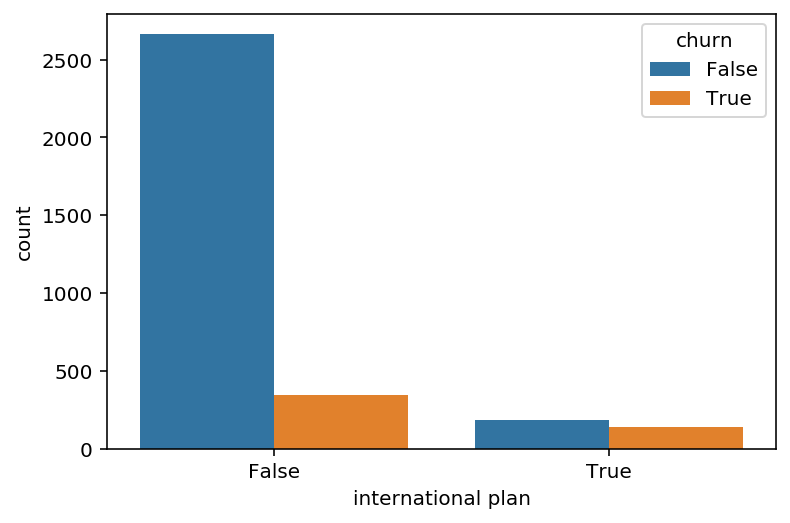

In [45]:
sns.countplot(x='international plan', hue='churn', data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

__Next, let's look at another important feature – *Customer service calls* vs 'Churn'. Let's also make a summary table and a picture__

In [46]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True,normalize=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,0.1814,0.3180,0.2018,0.1153,0.0267,0.0078,0.0024,0.0012,0.0003,0.0000,0.855
True,0.0276,0.0366,0.0261,0.0132,0.0228,0.0120,0.0042,0.0015,0.0003,0.0006,0.145
All,0.2090,0.3547,0.2279,0.1285,0.0495,0.0198,0.0066,0.0027,0.0006,0.0006,1.000


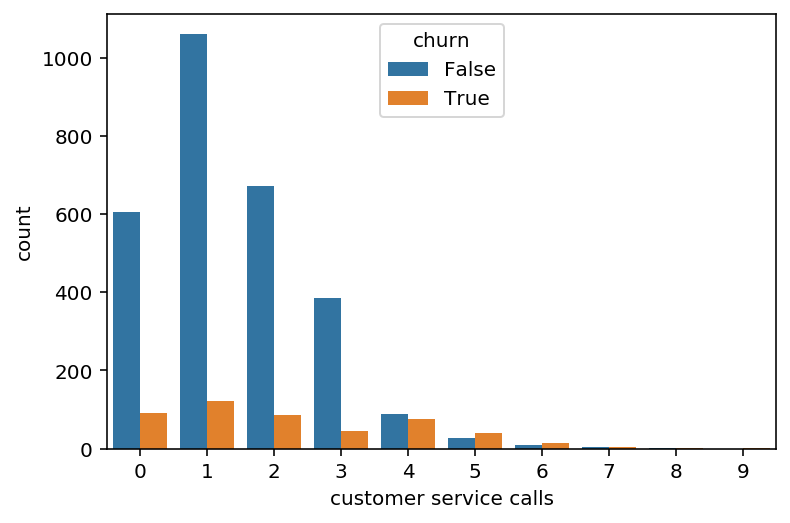

In [47]:
# Plot the above data in the form of a graph
sns.countplot(x='customer service calls', hue='churn', data=df);

__Add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn__ 

In [48]:
df['many service calls'] = (df['customer service calls'] > 3).astype('int')

In [49]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,many service calls
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,False,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0
3329,WV,68,415,370-3271,False,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0
3330,RI,28,510,328-8230,False,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0
3331,CT,184,510,364-6381,True,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0


__Next, let's look at another important feature – *Many_service_calls* vs *Churn*. Let's also make a summary table and a picture__

In [50]:
df['many service calls'].value_counts()

0    3066
1     267
Name: many service calls, dtype: int64

In [51]:
# Plot the above data in the form of a graph
pd.crosstab([df['international plan'] & df['many service calls']], df['churn'],margins=True,normalize=True)

churn,False,True,All
row_0,,,
False,0.8523,0.1393,0.9916
True,0.0027,0.0057,0.0084
All,0.8550,0.1450,1.0000


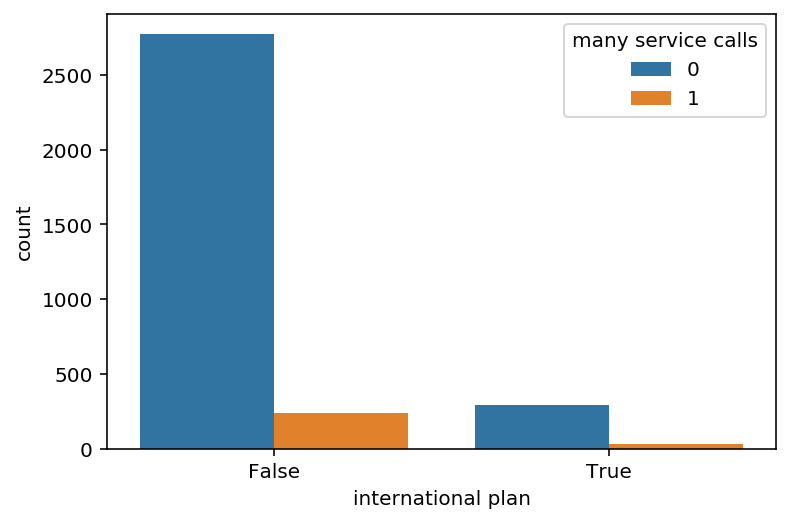

In [52]:
sns.countplot(x='international plan',hue='many service calls', data = df)


__Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*__



In [53]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True,normalize=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,0.1814,0.3180,0.2018,0.1153,0.0267,0.0078,0.0024,0.0012,0.0003,0.0000,0.855
True,0.0276,0.0366,0.0261,0.0132,0.0228,0.0120,0.0042,0.0015,0.0003,0.0006,0.145
All,0.2090,0.3547,0.2279,0.1285,0.0495,0.0198,0.0066,0.0027,0.0006,0.0006,1.000


In [54]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])

ads.head()

ads['2017-09-13']

ads['2017-09-13 01:00:00' : '2017-09-13 17:00:00' ]


currency['2017-05-02':'2017-06-05']

,GEMS_GEMS_SPENT
Time,
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775
2017-05-06,606535
2017-05-07,1112763
2017-05-08,1121218
2017-05-09,813844
2017-05-10,903343


In [55]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

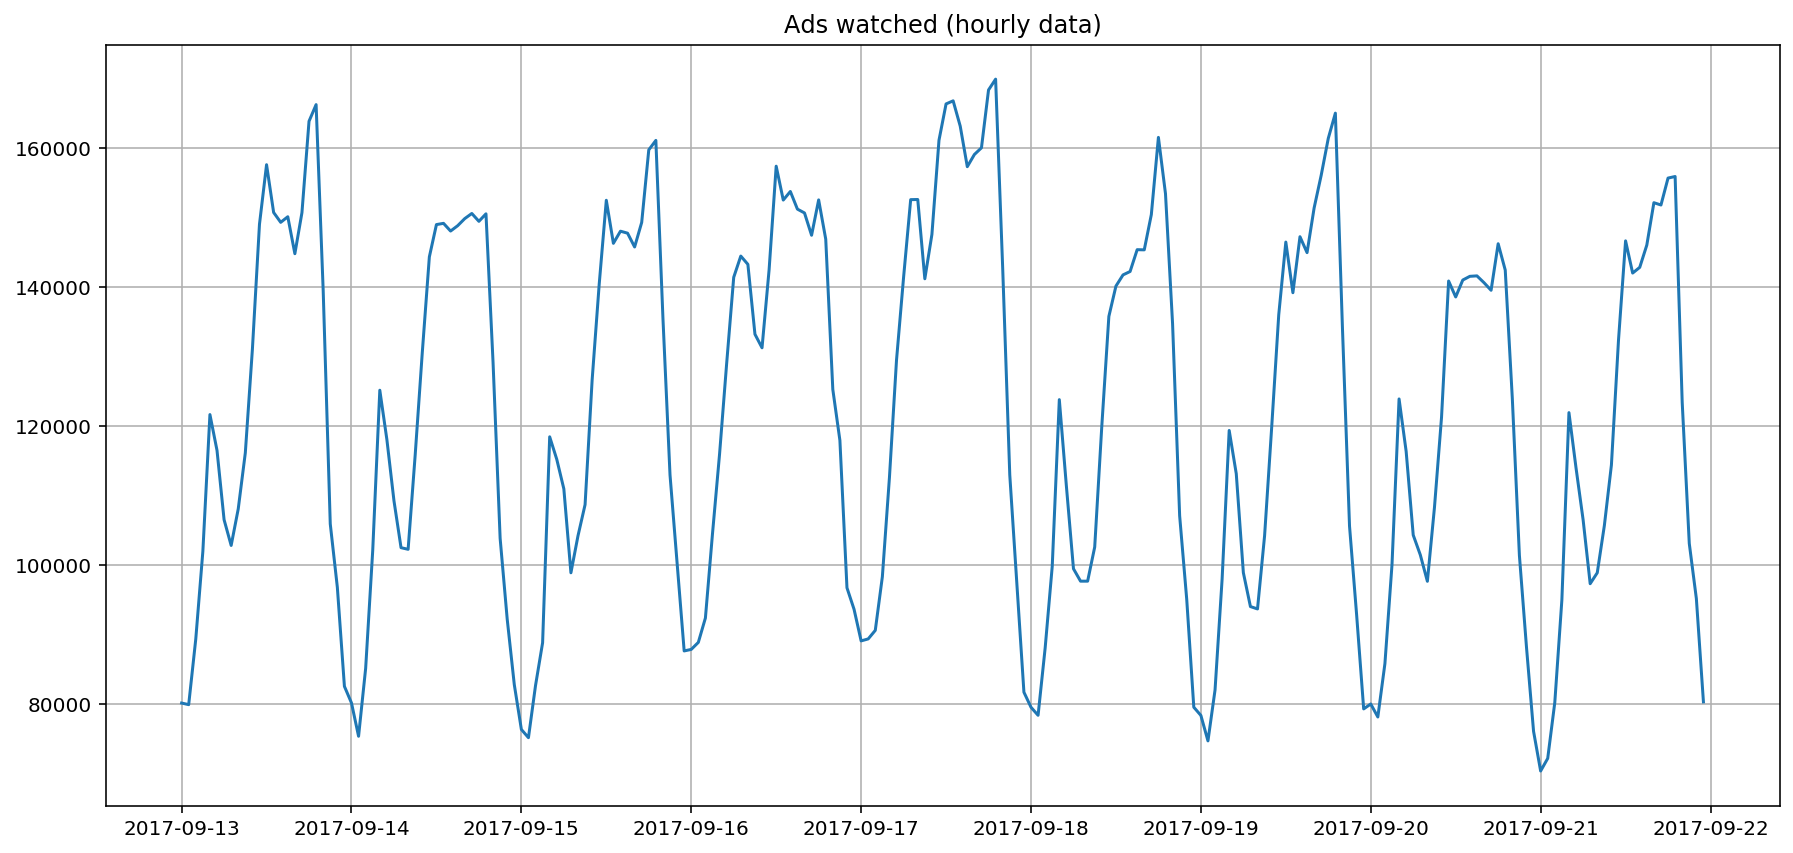

In [56]:
plt.figure(figsize=(15, 7))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

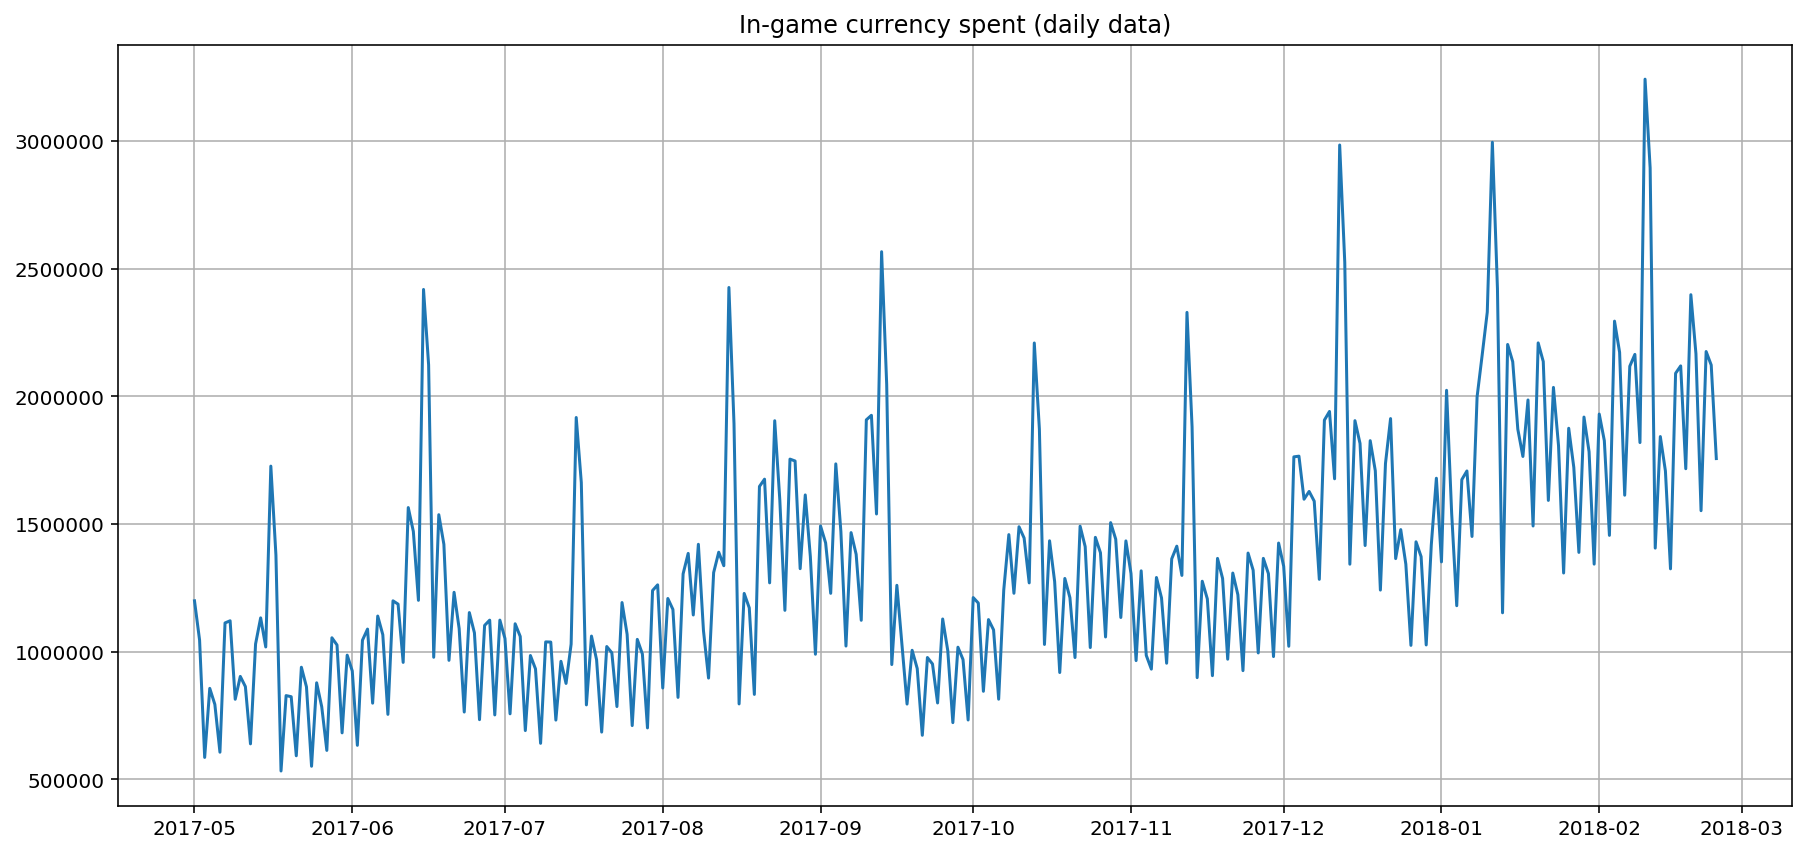

In [57]:
plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

# <center> Q1. Exploratory data analysis with Pandas on Socio-Demographic Data


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. 

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [70]:
# You code here
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [72]:
data[data['sex']== 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [84]:
print((data[data['native-country'] == 'Germany']['native-country']).size/((float) (data['native-country'].size)))

print(data[data['native-country'] == 'Germany']['native-country'].size)

print(data[data['native-country'] == 'Germany'].shape)
print(data['native-country'].shape)

0.004207487485028101
137
(137, 15)
(32561,)


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [86]:
import numpy as np
data['salary'].value_counts()

data.groupby(by=['salary'])['age'].agg([np.mean,np.std])

,mean,std
salary,,
<=50K,36.7837,14.0201
>50K,44.2498,10.5190


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [88]:
data[data['salary'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [89]:
data.groupby(by=['race','sex'])['age'].describe()

count     mean      std   min   25%   50%    75%  \
race               sex                                                          
Amer-Indian-Eskimo Female    119.0  37.1176  13.1150  17.0  27.0  36.0  46.00   
                   Male      192.0  37.2083  12.0496  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.0896  12.3008  17.0  25.0  33.0  43.75   
                   Male      693.0  39.0736  12.8839  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.8540  12.6372  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.6826  12.8826  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.6789  11.6316  17.0  23.0  29.0  39.00   
                   Male      162.0  34.6543  11.3555  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.8116  14.3291  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.6525  13.4360  17.0  29.0  38.0  49.00   

                            max  
race               sex           
Amer-Indian-Eskimo Female  80.0  
                   Male    82.0  
Asian-Pac-Islander Female  75.0  
                   Male    90.0  
Black              Female  90.0  
                   Male    90.0  
Other              Female  74.0  
                   Male    77.0  
White              Female  90.0  
                   Male    90.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [99]:
data['Married'] = data['marital-status'].apply(lambda x: x in ['Married-civ-spouse', 'Married-spouse-absent' , 'Married-AF-spouse'])

data[data['salary'] == '<=50K']['Married'].value_counts(normalize=True)
data[data['salary'] == '<=50K']['Married'].value_counts()

False    16039
True      8681
Name: Married, dtype: int64

In [143]:
data.groupby(by=['salary','sex'])['Married'].value_counts()

salary  sex     Married
<=50K   Female  False      8487
                True       1105
        Male    True       7576
                False      7552
>50K    Female  True        771
                False       408
        Male    True       5965
                False       697
Name: Married, dtype: int64

In [145]:
data.groupby(by=['salary','sex'])['Married'].value_counts(normalize=True)

salary  sex     Married
<=50K   Female  False      0.8848
                True       0.1152
        Male    True       0.5008
                False      0.4992
>50K    Female  True       0.6539
                False      0.3461
        Male    True       0.8954
                False      0.1046
Name: Married, dtype: float64

In [147]:
data[data['sex']== 'Male'].groupby(by=['salary'])['Married'].value_counts()

salary  Married
<=50K   True       7576
        False      7552
>50K    True       5965
        False       697
Name: Married, dtype: int64

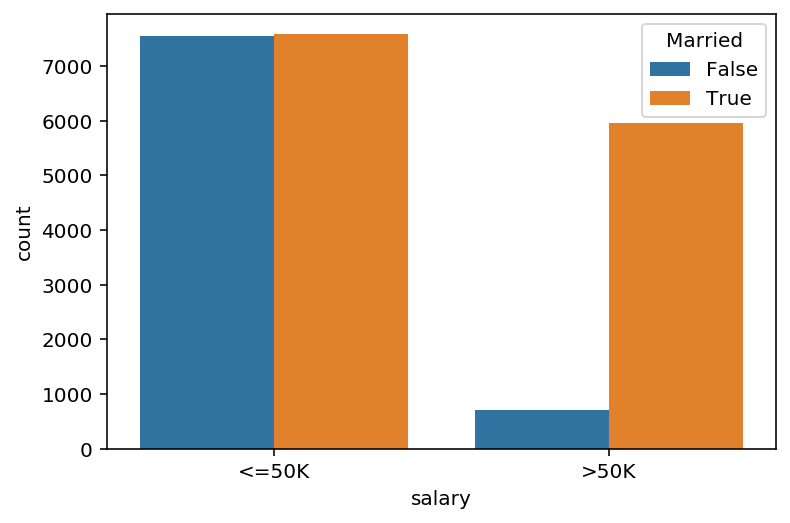

In [149]:
sns.countplot(x='salary', hue='Married',data=data[data['sex']== 'Male'])

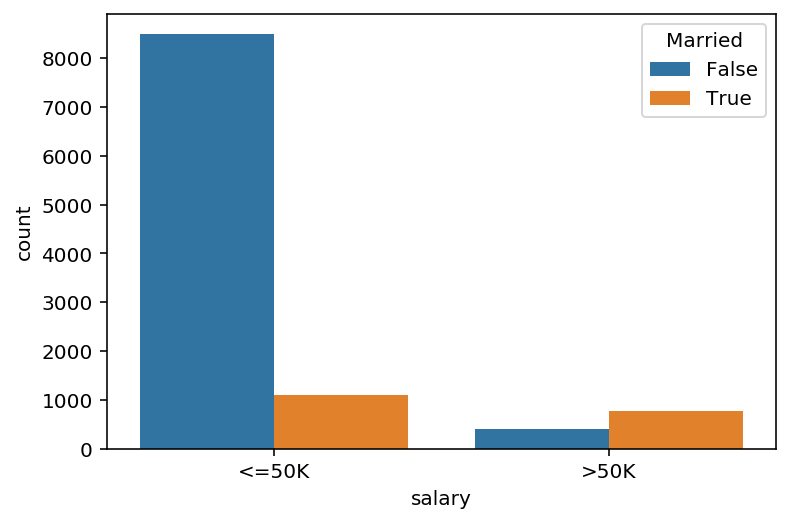

In [151]:
sns.countplot(x='salary', hue='Married',data=data[data['sex']== 'Female'])

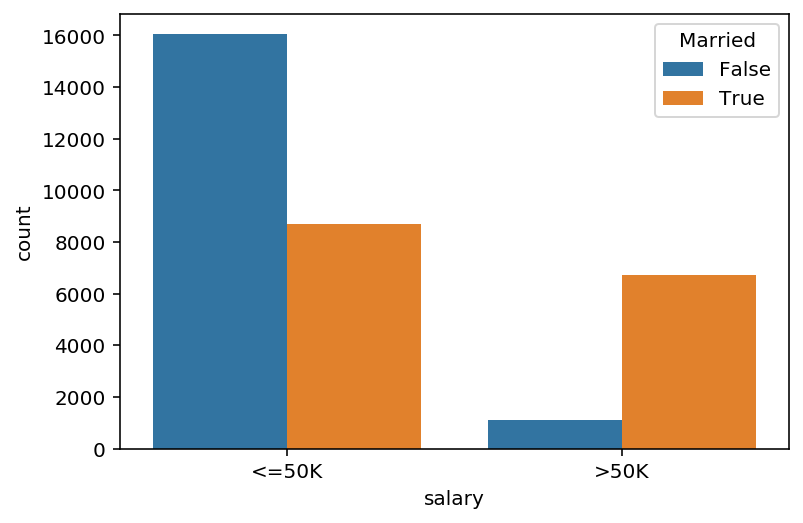

In [152]:
sns.countplot(x='salary', hue='Married',data=data)

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [106]:
data['hours-per-week']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 32561, dtype: int64

In [135]:
data['hours-per-week'].value_counts()


(data['hours-per-week']//1)*1
data['hour-bucket'] = (data['hours-per-week']//1)*1

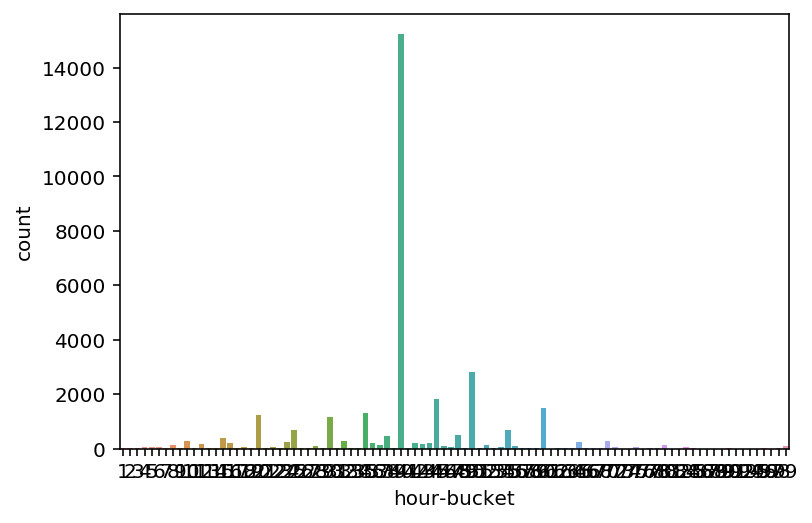

In [136]:
sns.countplot(x='hour-bucket',data=data)

In [137]:
data.groupby(by='hour-bucket')['salary'].describe()

,count,unique,top,freq
hour-bucket,,,,
1,20,2,<=50K,18
2,32,2,<=50K,24
3,39,2,<=50K,38
4,54,2,<=50K,51
5,60,2,<=50K,53
...,...,...,...,...
95,2,2,>50K,1
96,5,2,<=50K,4
97,2,2,>50K,1


In [138]:
pd.crosstab(data['salary'],data['hour-bucket'])

hour-bucket,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,94,95,96,97,98,99
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,18,24,38,51,53,56,22,134,17,258,...,1,19,3,1,1,1,4,1,8,60
>50K,2,8,1,3,7,8,4,11,1,20,...,1,10,0,0,0,1,1,1,3,25


In [139]:
pd.crosstab(data['salary'],data['hour-bucket'],normalize=True,margins=True)

hour-bucket,1,2,3,4,5,6,7,8,9,10,...,90,91,92,94,95,96,97,98,99,All
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,5.5281e-04,0.0007,1.1670e-03,1.5663e-03,0.0016,0.0017,0.0007,0.0041,5.2210e-04,0.0079,...,0.0006,9.2135e-05,3.0712e-05,3.0712e-05,3.0712e-05,1.2285e-04,3.0712e-05,2.4569e-04,0.0018,0.7592
>50K,6.1423e-05,0.0002,3.0712e-05,9.2135e-05,0.0002,0.0002,0.0001,0.0003,3.0712e-05,0.0006,...,0.0003,0.0000e+00,0.0000e+00,0.0000e+00,3.0712e-05,3.0712e-05,3.0712e-05,9.2135e-05,0.0008,0.2408
All,6.1423e-04,0.0010,1.1978e-03,1.6584e-03,0.0018,0.0020,0.0008,0.0045,5.5281e-04,0.0085,...,0.0009,9.2135e-05,3.0712e-05,3.0712e-05,6.1423e-05,1.5356e-04,6.1423e-05,3.3783e-04,0.0026,1.0000


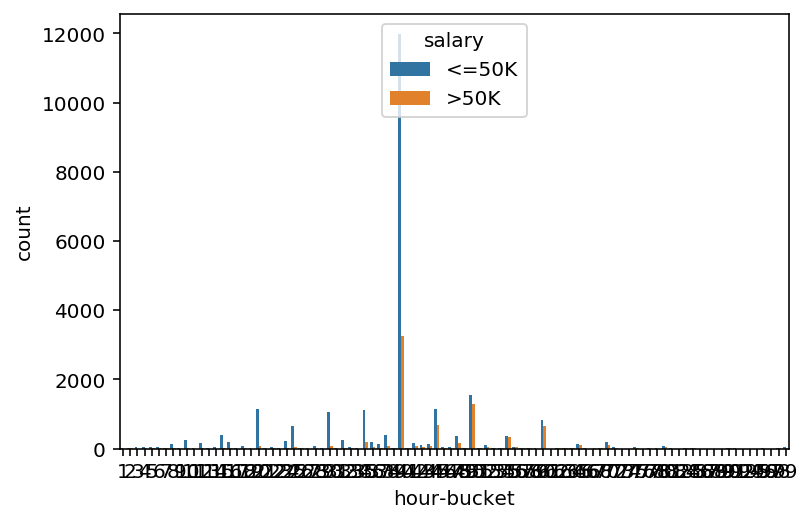

In [140]:
sns.countplot(x='hour-bucket',hue='salary',data=data)

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [163]:
data_hours = data.groupby(by=['native-country','salary'])[['hours-per-week']].agg(np.mean).sort_values(by='hours-per-week',ascending=False)

In [165]:
data_hours.transpose()

native-country,Honduras,Thailand,South,France,Greece,Hungary,Columbia,Yugoslavia,Ecuador,Ireland,...,Vietnam,Trinadad&Tobago,Guatemala,Haiti,Nicaragua,El-Salvador,Peru,Honduras,Taiwan,Hungary
salary,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,>50K,...,<=50K,<=50K,>50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K,<=50K
hours-per-week,60.0,58.3333,51.4375,50.75,50.625,50.0,50.0,49.5,48.75,48.0,...,37.1935,37.0588,36.6667,36.325,36.0938,36.0309,35.069,34.3333,33.7742,31.3


In [166]:
data_hours

,,hours-per-week
native-country,salary,
Honduras,>50K,60.0000
Thailand,>50K,58.3333
South,>50K,51.4375
France,>50K,50.7500
Greece,>50K,50.6250
...,...,...
El-Salvador,<=50K,36.0309
Peru,<=50K,35.0690
Honduras,<=50K,34.3333


In [167]:
data_hours = data.groupby(by=['native-country','salary'])[['hours-per-week']].agg(np.mean)

In [169]:
data_hours.loc[['Japan']]

hours-per-week
native-country salary                
Japan          <=50K          41.0000
               >50K           47.9583

In [173]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean,margins=True).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.1648,41.4167,37.9146,37.3818,38.6842,37.9857,42.3382,38.0417,36.0309,40.4833,...,38.4706,39.4444,40.1562,33.7742,42.8667,37.0588,38.7991,37.1935,41.6000,38.8402
>50K,45.5479,40.0000,45.6410,38.9000,50.0000,42.4400,47.0000,48.7500,45.0000,44.5333,...,39.4167,46.6667,51.4375,46.8000,58.3333,40.0000,45.5054,39.2000,49.5000,45.4730
All,41.5129,40.8947,40.4050,37.7867,39.0678,39.1579,42.4714,39.5714,36.7925,41.8333,...,38.5702,41.2500,42.4125,38.8824,45.4444,37.3684,40.4478,37.3433,44.5625,40.4375
